In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


Load Data


In [2]:
health_df = pd.read_csv("..\\data\\cdc_data\\all_states_all_codes_by_year.csv")
health_df = health_df[health_df.columns[1:-1]]
health_df = health_df[['State','Year','Deaths','Population']]
health_df.head()
print(health_df.shape)

health_df[health_df.Year>=2010].reset_index().groupby('State').Year.count()

(1242, 4)


State
Alabama            6
Alaska             2
Arizona           11
Arkansas          11
California        11
Colorado           7
Connecticut        2
Delaware           1
Florida           11
Georgia           11
Idaho              1
Illinois          11
Indiana           11
Iowa               3
Kansas             6
Kentucky           9
Louisiana          9
Maine              1
Maryland          11
Massachusetts      4
Michigan          11
Minnesota          8
Mississippi        9
Missouri          11
Nevada             2
New Hampshire      1
New Jersey        11
New Mexico         3
New York          11
North Carolina    11
North Dakota       1
Ohio              11
Oklahoma          11
Oregon             4
Pennsylvania      11
Rhode Island       1
South Carolina    11
Tennessee          9
Texas             11
Utah               5
Vermont            4
Virginia          10
Washington        11
West Virginia      1
Wisconsin          9
Wyoming            1
Name: Year, dtype: int64

Creating a pivot table by state and plotting a single state's maturnal mortality by year.

<Axes: xlabel='Year', ylabel='Alabama'>

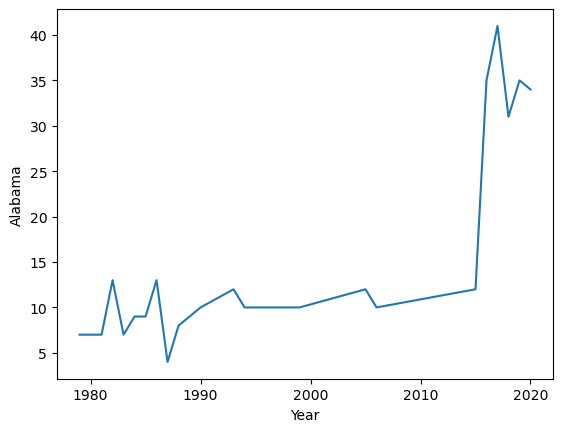

In [4]:
health_data_by_state = pd.pivot(data = health_df[health_df.columns[:-1]], index= 'Year', values = 'Deaths', columns = 'State')
health_data_by_state.head()
sns.lineplot(data = health_data_by_state, x='Year', y='Alabama')

Same thing but using all states.

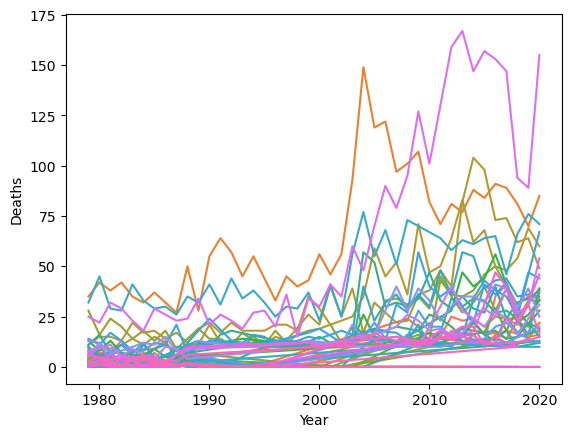

In [5]:
g = sns.lineplot(x="Year", y="Deaths", hue = "State",
             data = health_df)
g.get_legend().set_visible(False)

Load American Community Survey Data from 2010 -- 2023.

In [6]:
income_data_by_year = pd.read_csv("..\\data\\acs_income_by_year\\all_income_from_2010_to_2023.csv")
income_data_by_year = income_data_by_year[income_data_by_year.columns[1:]]
income_data_by_year.head()

,label,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Year
0,Total,4499250,637189,5802329,2784750,30895516,4880794,3374247,819105,562051,...,6076732,21864324,2303262,639522,7503091,6510966,1856181,5684378,565362,2010
1,"Less than $10,000",418610,23792,414482,236611,1690857,292621,168550,41478,54450,...,498610,1498007,106226,39208,381242,373185,166375,313863,28830,2010
2,"$10,000 to $14,999",291136,24791,301174,186755,1486323,215476,126902,33080,28437,...,394276,1159043,87318,34480,287530,255458,131215,282974,26476,2010
3,"$15,000 to $24,999",568262,46620,620656,379359,2969203,453430,267370,74379,42680,...,755498,2393748,214379,67631,619645,593046,263855,610717,51856,2010
4,"$25,000 to $34,999",515050,52474,663570,371449,2756878,460827,254943,73764,41888,...,717863,2345983,218944,66262,641981,607050,232091,609236,53180,2010


Make a pivot table to more easily analyze comparisons state-by-state.

In [7]:
income_data_by_year_pivot = pd.pivot(data = income_data_by_year,  index ='Year', columns= 'label')
income_data_by_year_pivot.head()

Alabama                                          \
label $10,000 to $14,999 $100,000 to $149,999 $15,000 to $24,999   
Year                                                               
2010              291136               462295             568262   
2011              301415               493341             578322   
2012              305937               504548             549369   
2013              264771               508054             531635   
2014              275963               529783             544929   

                                                                \
label $150,000 to $199,999 $200,000 or more $25,000 to $34,999   
Year                                                             
2010                155190           110550             515050   
2011                146009           124298             515260   
2012                157310           122960             504403   
2013                162162           133209             492943   
2014                178976           136422             503296   

                                                                \
label $35,000 to $49,999 $50,000 to $74,999 $75,000 to $99,999   
Year                                                             
2010              683128             805464             487371   
2011              666017             822551             530395   
2012              651944             821489             541406   
2013              655986             831959             518937   
2014              656498             806382             524947   

                         ...              Wyoming                     \
label Less than $10,000  ... $100,000 to $149,999 $15,000 to $24,999   
Year                     ...                                           
2010             418610  ...                81826              51856   
2011             405262  ...                89520              53436   
2012             412047  ...                84640              51954   
2013             401977  ...                93777              46700   
2014             396115  ...               102847              57327   

                                                                \
label $150,000 to $199,999 $200,000 or more $25,000 to $34,999   
Year                                                             
2010                 23726            15929              53180   
2011                 22064            15959              57388   
2012                 28762            15211              52137   
2013                 29311            21334              51558   
2014                 29051            21919              54025   

                                                                \
label $35,000 to $49,999 $50,000 to $74,999 $75,000 to $99,999   
Year                                                             
2010               74976             124718              83604   
2011               74912             114462              86999   
2012               76118             110496              89635   
2013               73104             114807              84814   
2014               75416             108981              84343   

                                 
label Less than $10,000   Total  
Year                             
2010              28830  565362  
2011              23081  559541  
2012              26105  562424  
2013              26159  566023  
2014              27590  582228  

[5 rows x 572 columns]

What happens if we analyze only Wisconsin data?

In [8]:
WiscX = np.array(income_data_by_year_pivot.Wisconsin[income_data_by_year_pivot.Wisconsin.index.isin([2010,2011,2013,2014,2015,2016,2017,2019,2020])])
WiscX
y = health_data_by_state.Wisconsin[health_data_by_state.Wisconsin.index.isin([2010+j for j in range(14) if j !=10 and j!=2 and j!=8])]
y = np.array(y)

Can we see anything with various regression models?

c:\Users\david\anaconda3\envs\erdos_spring_2025\Lib\site-packages\sklearn\linear_model\_glm\glm.py:285: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


8


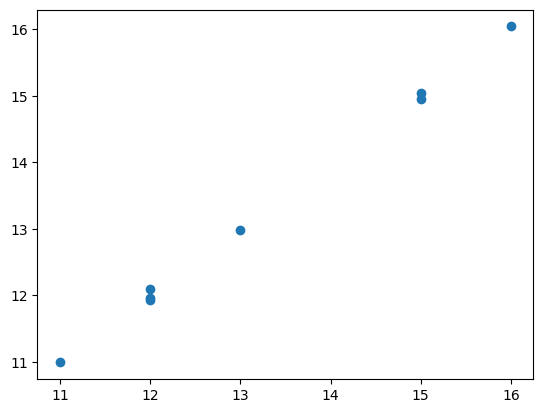

In [60]:
from sklearn.linear_model import LinearRegression,Ridge, Lasso, PoissonRegressor
model = PoissonRegressor(alpha = 100)
model.fit(WiscX, y)
yest = model.predict(WiscX)
plt.scatter(y,yest)
print(len(y))

Some statistics.

In [10]:
from scipy import stats
for col in range(WiscX.shape[1]):
    print(stats.pearsonr(WiscX[:,col], y))


PearsonRResult(statistic=np.float64(-0.015775648170211598), pvalue=np.float64(0.9704255669425956))
PearsonRResult(statistic=np.float64(-0.1008391643840007), pvalue=np.float64(0.81220439025058))
PearsonRResult(statistic=np.float64(0.1292352145848286), pvalue=np.float64(0.7603685202346431))
PearsonRResult(statistic=np.float64(-0.08489377046936442), pvalue=np.float64(0.8415873085355619))
PearsonRResult(statistic=np.float64(-0.08951830260566959), pvalue=np.float64(0.8330477235166118))
PearsonRResult(statistic=np.float64(0.01479275454459443), pvalue=np.float64(0.9722676312547516))
PearsonRResult(statistic=np.float64(0.2092162921964797), pvalue=np.float64(0.6190162622995958))
PearsonRResult(statistic=np.float64(-0.010551535136517194), pvalue=np.float64(0.9802173400125376))
PearsonRResult(statistic=np.float64(-0.1644187964464528), pvalue=np.float64(0.6972257246987396))
PearsonRResult(statistic=np.float64(0.1829620579032609), pvalue=np.float64(0.6645251021734957))
PearsonRResult(statistic=np.f

Let's try to analyze all the states and all the income data at one.

In [11]:
#Let's create a large data set
USSTATES = [x for x in health_data_by_state.columns]


X_all = []
y_all = []
for State in USSTATES:
    for year in income_data_by_year_pivot[State].index:
        if year<=2020:
            x_new = np.array(income_data_by_year_pivot[State].iloc[income_data_by_year_pivot[State].index==year]).reshape(-1)
            y_new = np.array(health_data_by_state[State].iloc[health_data_by_state[State].index==year]).reshape(-1)
            if y_new[0].is_integer():
                y_all.append(y_new)
                X_all.append(x_new)
X_all = np.array(X_all)
print(X_all.shape)
y_all = np.array(y_all).reshape(-1)
print(y_all.shape)

(293, 11)
(293,)


c:\Users\david\anaconda3\envs\erdos_spring_2025\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.352e+04, tolerance: 2.280e+01
  model = cd_fast.enet_coordinate_descent(


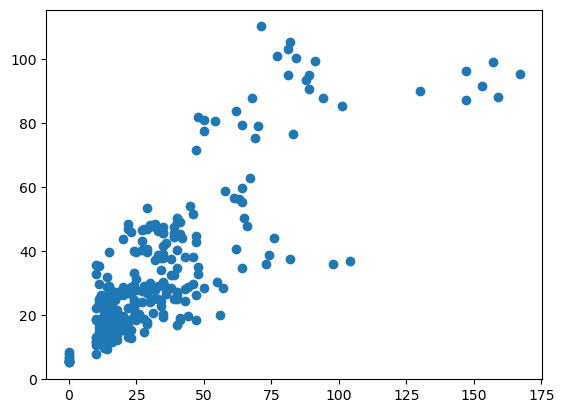

In [12]:
model = Lasso()
model.fit(X_all[:,0:3],y_all)
y_est = model.predict(X_all[:,0:3])
plt.scatter(y_all,y_est)

Loading some health-care data.

In [13]:
mystring_to_int = lambda str : int(str.replace(',',''))
mypercent_to_float = lambda str : float(str.replace('%',''))/100 if '%' in str else 0
health_df_dict = {}
for year in [2010+j for j in range(14) if  j != 10]:
    health_df_dict[year] = pd.read_csv(f"..\\data\\acs_health_insurance_data\\HI_{year}.csv")

health_data_for_all_states = pd.DataFrame()
health_data_for_all_states ['Year'] =[2010+j for j in range(0,14) if j!= 10]
for us_state in USSTATES:
    uninsured_per_state = []
    for year in range(2010,2015):
        uninsured_per_state.append( mystring_to_int(health_df_dict[year][us_state+"!!Number Uninsured!!Estimate"][0]))
    for year in range(2015,2024):
        if year != 2020:
            uninsured_per_state.append(mystring_to_int(health_df_dict[year][us_state+"!!Uninsured!!Estimate"][0]))
    health_data_for_all_states[us_state] = uninsured_per_state


    



Merging Data Sets for only Wisconsin

In [14]:
wisc_only_data = pd.merge(
                         left = health_data_by_state.Wisconsin, 
                          right = health_data_for_all_states[["Wisconsin", "Year"]], 
                          how='inner', 
                          left_on = health_data_by_state.Wisconsin.index, 
                          right_on = health_data_for_all_states[["Wisconsin", "Year"]].Year,
                          suffixes=['_Mat_death', '_unisured']
                          )
wisc_only_data = wisc_only_data[wisc_only_data.columns[1:]]
wisc_only_data = pd.merge(left = wisc_only_data,
                          right = income_data_by_year_pivot.Wisconsin[["Less than $10,000", "$10,000 to $14,999","$15,000 to $24,999"]],
                        how = 'inner',
                        left_on = wisc_only_data.Year,
                        right_on = income_data_by_year_pivot.Wisconsin[["Less than $10,000", "$10,000 to $14,999","$15,000 to $24,999"]].index
)
wisc_only_data = wisc_only_data[wisc_only_data.columns[1:]]
wisc_only_data = wisc_only_data[wisc_only_data.Wisconsin_Mat_death>=0]
wisc_only_data.set_index('Year', inplace= True)


In [15]:
wisc_only_data

,Wisconsin_Mat_death,Wisconsin_unisured,"Less than $10,000","$10,000 to $14,999","$15,000 to $24,999"
Year,,,,,
2010,12.0,529200,313863,282974,610717
2011,15.0,506674,324013,271846,586680
2013,12.0,517796,311110,267832,551770
2014,16.0,417723,291843,241463,557172
2015,11.0,322616,273182,234989,520052
2016,15.0,300206,272843,235410,505049
2017,12.0,309404,252791,231106,494842
2019,13.0,328654,225846,203587,437603


Some correlation for all of Wisconsin.

In [16]:
wisc_only_data.corr(method = "pearson")

,Wisconsin_Mat_death,Wisconsin_unisured,"Less than $10,000","$10,000 to $14,999","$15,000 to $24,999"
Wisconsin_Mat_death,1.000000,0.044188,0.182962,-0.015776,0.129235
Wisconsin_unisured,0.044188,1.000000,0.860623,0.882147,0.831295
"Less than $10,000",0.182962,0.860623,1.000000,0.954793,0.952348
"$10,000 to $14,999",-0.015776,0.882147,0.954793,1.000000,0.950762
"$15,000 to $24,999",0.129235,0.831295,0.952348,0.950762,1.000000


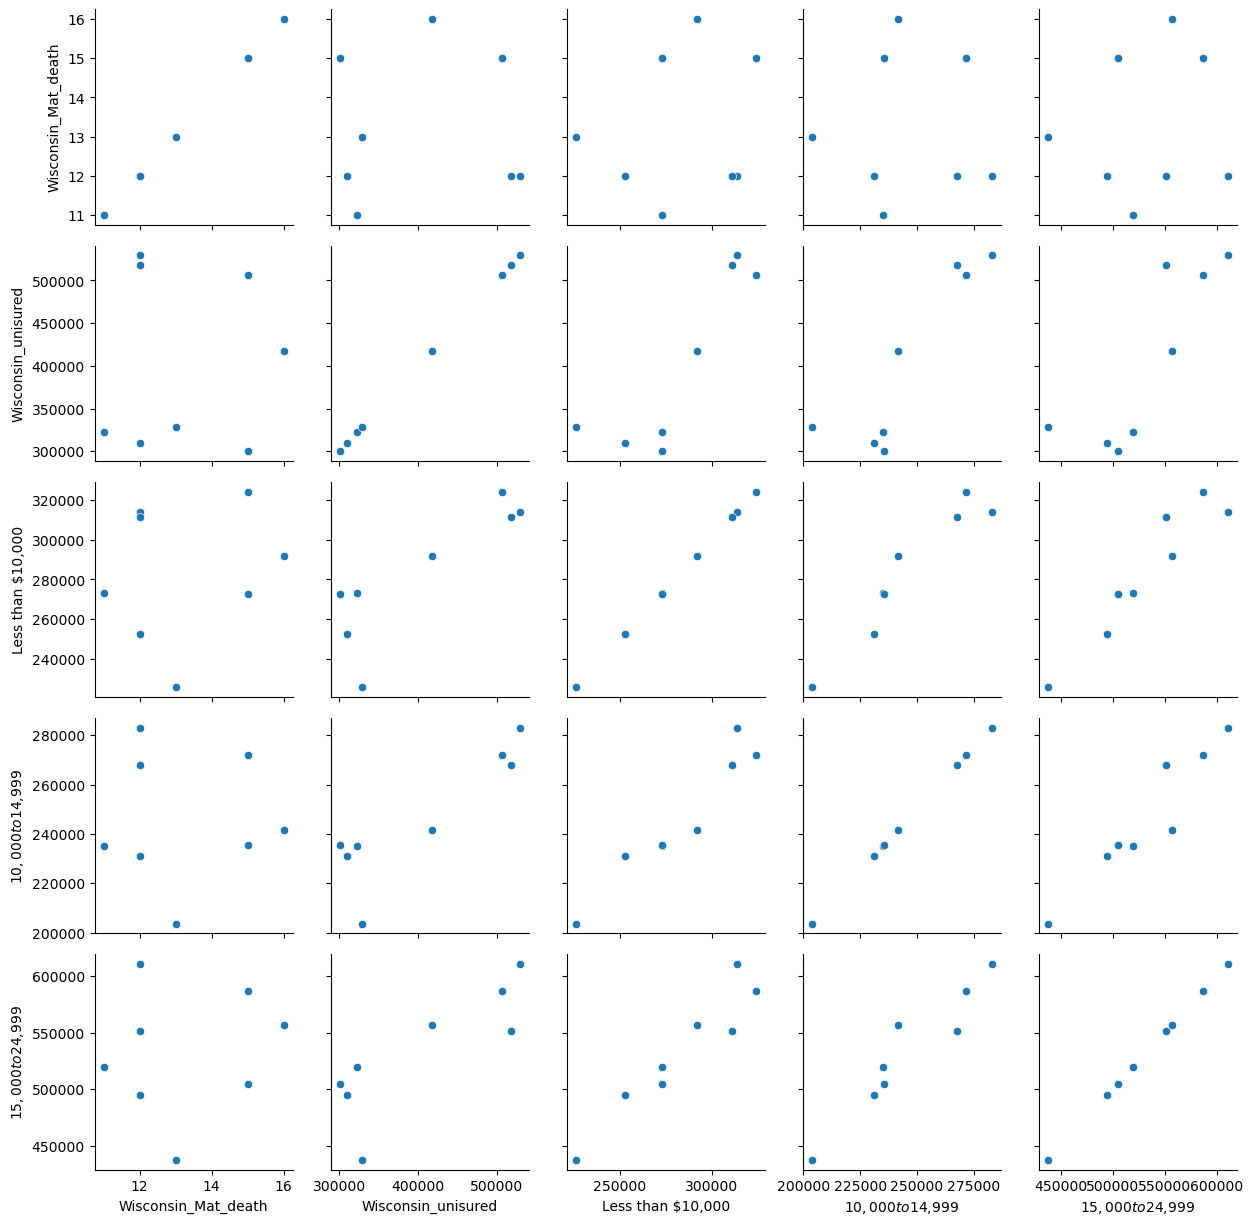

In [17]:
g = sns.PairGrid(wisc_only_data)
g.map(sns.scatterplot)

Let's look at the same thing with the information from all the income and all the health-care data.

In [58]:
column_names = [x[1] for x in list(income_data_by_year_pivot.columns) if x[0] == 'Alabama']
column_names.append("Mat Death")
print(column_names)
quick_health_care_data2 = pd.DataFrame(np.hstack ((X_all,y_all.reshape(-1,1))), columns = column_names)
quick_health_care_data2.corr(method="pearson")
print(quick_health_care_data2.shape)

['$10,000 to $14,999', '$100,000 to $149,999', '$15,000 to $24,999', '$150,000 to $199,999', '$200,000 or more', '$25,000 to $34,999', '$35,000 to $49,999', '$50,000 to $74,999', '$75,000 to $99,999', 'Less than $10,000', 'Total', 'Mat Death']
(293, 12)


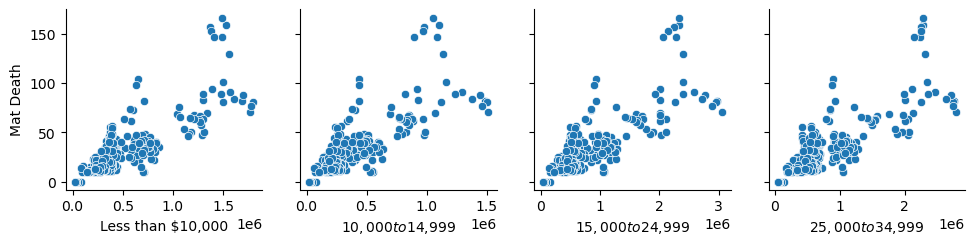

In [19]:
g = sns.PairGrid(data = quick_health_care_data2, y_vars = ["Mat Death"], x_vars = ["Less than $10,000", "$10,000 to $14,999","$15,000 to $24,999", "$25,000 to $34,999"])
g.map(sns.scatterplot)
#Omit y_vars and x_vars to include all the info.

Some bootstrap testing.

In [55]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.pipeline import Pipeline

In [56]:
slopes= []
resampled_model = Pipeline([ ('scal',QuantileTransformer(n_quantiles = 100)),('lin', PoissonRegressor())])
nobs = 100
for i in range(10000):
    resampled_df = quick_health_care_data2.sample(n=nobs, replace=True)
    resampled_model.fit(resampled_df[['Less than $10,000','$10,000 to $14,999']].values.reshape(-1,2), resampled_df["Mat Death"])
    slopes.append(list(resampled_model['lin'].coef_))
    if i==0:
        print(list(resampled_model['lin'].coef_))

quantiles = np.quantile(slopes, [0.025, 0.5, 0.975])

print("2.5th percentile:", quantiles[0])
print("97.5th percentile:", quantiles[2])

c:\Users\david\anaconda3\envs\erdos_spring_2025\Lib\site-packages\sklearn\preprocessing\_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (100). n_quantiles is set to n_samples.
  warnings.warn(
c:\Users\david\anaconda3\envs\erdos_spring_2025\Lib\site-packages\sklearn\preprocessing\_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (100). n_quantiles is set to n_samples.
  warnings.warn(
c:\Users\david\anaconda3\envs\erdos_spring_2025\Lib\site-packages\sklearn\preprocessing\_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (100). n_quantiles is set to n_samples.
  warnings.warn(
c:\Users\david\anaconda3\envs\erdos_spring_2025\Lib\site-packages\sklearn\preprocessing\_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (100). n_quantiles is set to n_samples.
  warnings.warn(
c:\Users\david\anaconda3\envs\erdos_spring_2025\Lib\site

[np.float64(0.8952656181037811), np.float64(0.6746416315204289)]


c:\Users\david\anaconda3\envs\erdos_spring_2025\Lib\site-packages\sklearn\preprocessing\_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (100). n_quantiles is set to n_samples.
  warnings.warn(
c:\Users\david\anaconda3\envs\erdos_spring_2025\Lib\site-packages\sklearn\preprocessing\_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (100). n_quantiles is set to n_samples.
  warnings.warn(
c:\Users\david\anaconda3\envs\erdos_spring_2025\Lib\site-packages\sklearn\preprocessing\_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (100). n_quantiles is set to n_samples.
  warnings.warn(
c:\Users\david\anaconda3\envs\erdos_spring_2025\Lib\site-packages\sklearn\preprocessing\_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (100). n_quantiles is set to n_samples.
  warnings.warn(
c:\Users\david\anaconda3\envs\erdos_spring_2025\Lib\site

2.5th percentile: 0.6195359338379676
97.5th percentile: 1.1342506988477896


c:\Users\david\anaconda3\envs\erdos_spring_2025\Lib\site-packages\sklearn\preprocessing\_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (100). n_quantiles is set to n_samples.
  warnings.warn(
c:\Users\david\anaconda3\envs\erdos_spring_2025\Lib\site-packages\sklearn\preprocessing\_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (100). n_quantiles is set to n_samples.
  warnings.warn(
c:\Users\david\anaconda3\envs\erdos_spring_2025\Lib\site-packages\sklearn\preprocessing\_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (100). n_quantiles is set to n_samples.
  warnings.warn(
c:\Users\david\anaconda3\envs\erdos_spring_2025\Lib\site-packages\sklearn\preprocessing\_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (100). n_quantiles is set to n_samples.
  warnings.warn(
c:\Users\david\anaconda3\envs\erdos_spring_2025\Lib\site

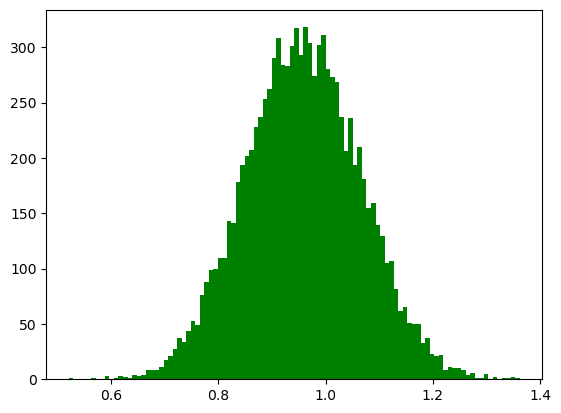

In [57]:
slopes = np.array(slopes)
plt.hist(slopes[:,0], bins = 100, color = 'g')
plt.show()

